In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import cv2

%matplotlib inline

In [50]:
df = pd.read_csv('lawan-tweets.csv')
df.head()

/opt/homebrew/Caskroom/miniforge/base/envs/main_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1423648107225489409,1423647771995766787,2021-08-06 22:12:13 +08,2021-08-06,22:12:13,800,228180161,markonahajis,shakila schön,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'YeopAmirul1648', 'name': 'Ye...",NaN,NaN,NaN,NaN
1,1423646952890142722,1423646952890142722,2021-08-06 22:07:38 +08,2021-08-06,22:07:38,800,2942486912,ft_dyemond,DyeMond🏴,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1423646307609055249,1421326242255556609,2021-08-06 22:05:04 +08,2021-08-06,22:05:04,800,235930304,hyadzr,fathul.hayad ϟ,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1423645692401233921,1423618760208896001,2021-08-06 22:02:37 +08,2021-08-06,22:02:37,800,25725375,sharimanshafie,Shariman Shafie,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'shfiqdniel', 'name': '弥助', '...",NaN,NaN,NaN,NaN
4,1423645284991586305,1423645284991586305,2021-08-06 22:01:00 +08,2021-08-06,22:01:00,800,943314923467108352,96qiu,#FreePalestine 🇵🇸,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [51]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [52]:
df = df['tweet']

In [53]:
text = " ".join(text for text in df)
text = text.split()
text = [i for i in text if i != '&amp;']
text = [i for i in text if 'http' not in i]
text = ' '.join([str(i) for i in text])

In [90]:
f = open('malay_stopwords.txt', 'r')
stopwords = f.read().split()
f = open('english_stopwords.txt', 'r')
stopwords.extend(f.read().split())

In [91]:
mask = cv2.imread('black-flag.jpeg')

In [92]:
wcloud = WordCloud(collocations=False,mask=mask,background_color='whitesmoke',stopwords=stopwords,colormap='viridis').generate(text)

In [93]:
image_colors = ImageColorGenerator(mask)

(-0.5, 999.5, 990.5, -0.5)

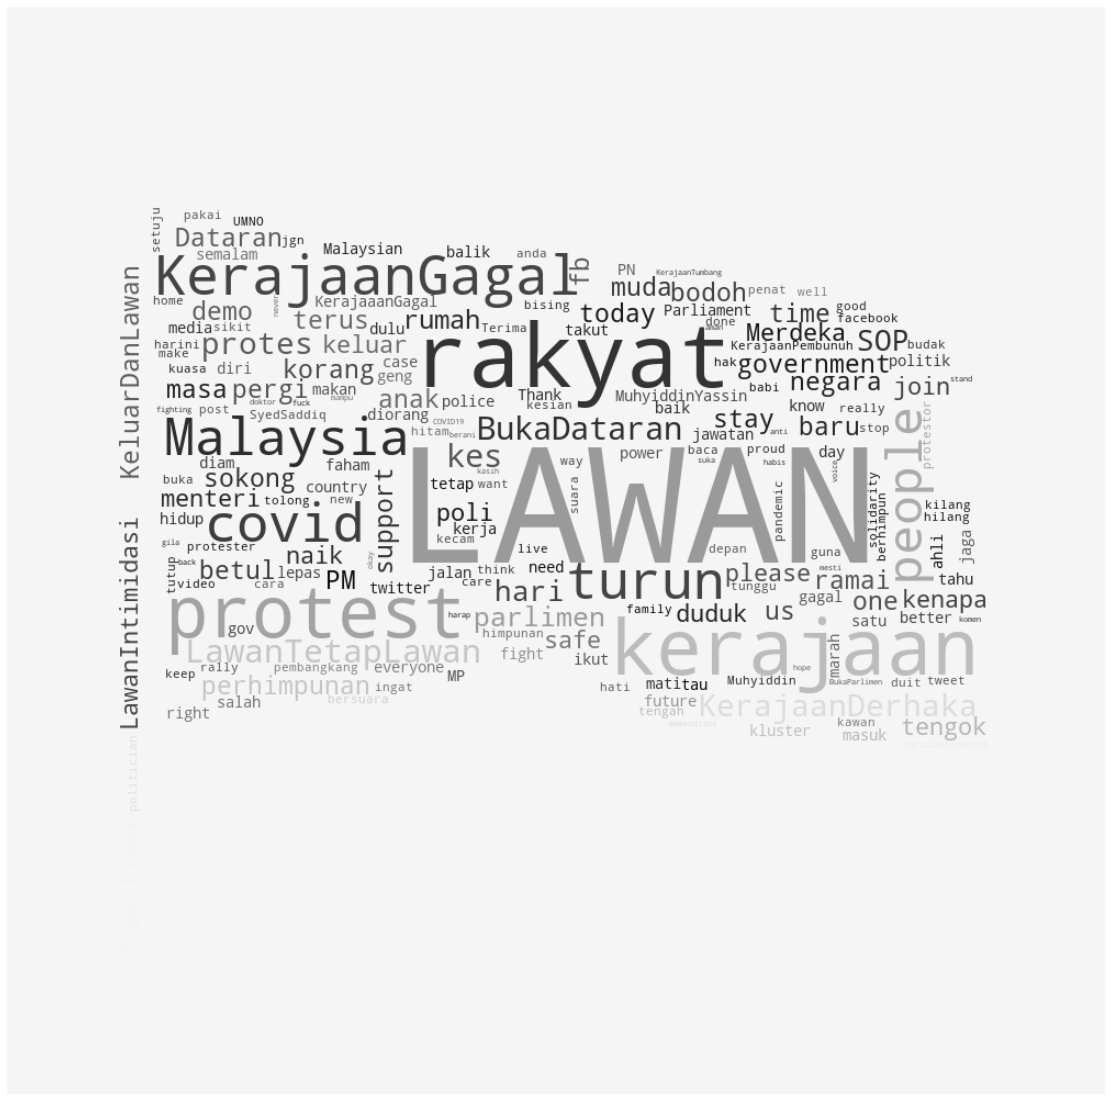

In [94]:
plt.figure(figsize=(20,20))
plt.imshow(wcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")

In [95]:
wcloud.to_file('lawan.png')